# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This project involves performing a comprehensive Exploratory Data Analysis (EDA) on the Uber Request Dataset with the goal of understanding customer demand patterns, operational inefficiencies, and driver availability issues. The dataset contains information about ride requests including timestamps, pickup points (City or Airport), request status (Trip Completed, Cancelled, No Cars Available), and driver assignments. The analysis was carried out using Python and a wide range of visualization techniques structured under the UBM (Univariate, Bivariate, Multivariate) methodology.

**Univariate Analysis**

Univariate visualizations were used to explore the individual distribution of categorical and numerical variables. It was found that a significant proportion of ride requests did not result in trip completion — either due to cancellations or unavailability of cars. The majority of requests originated from the City, indicating it is a high-demand location. Hour-wise analysis revealed peak demand times in two clear windows: morning (5–10 AM) and evening (5–9 PM). A histogram of trip durations indicated that most successful rides lasted less than 60 minutes, with a heavy right-skew showing a few longer trips.

**Bivariate Analysis**

In the bivariate stage, we analyzed relationships between two variables such as request hour vs. status, pickup point vs. status, and pickup point vs. trip duration. One key insight was that cancellations were disproportionately high in the City during morning hours, while the Airport suffered mostly from unavailability of cars during the evening peak. Box plots showed that trip durations from the Airport tend to be longer than those from the City. Status-wise breakdowns by hour revealed operational pressure during peak times, where demand far exceeds driver supply.

**Multivariate Analysis**

The multivariate analysis brought in a combination of time, location, and status to provide deeper context. A heatmap of cancellations by pickup point and hour visually reinforced demand–supply mismatches. Violin plots and swarm plots further showed variations in trip durations across statuses and pickup points. Faceted bar charts made it clear that time and location jointly influence operational performance. A correlation matrix confirmed that while time-based features had some influence, the dominant issues were categorical in nature—namely, pickup point and trip status.



# **GitHub Link -**

https://github.com/BNaveenKumar325

# **Problem Statement**


Uber, as a ride-hailing service, aims to ensure that customers can request and complete trips seamlessly at any time and location. However, recent operational data reveals a significant supply-demand gap during specific time slots, particularly from the Airport to the City during Night and Early Morning hours. The analysis of request data (refer to Figures 1.1, 1.2, and 1.3) shows that a large volume of ride requests remain unfulfilled during these timeframes.

This is primarily due to:

Cab unavailability at Night (late evening to early hours)

High cancellation rates by drivers during Early Morning and Morning slots

This results in poor user experience, loss of potential revenue, and decreased platform reliability. The issue is most prominent for Airport-originating rides, a critical segment for time-sensitive customers like business travelers and tourists.

#### **Define Your Business Objective?**

The main objective of this project is to:

-Identify the root causes of unfulfilled ride requests in Uber’s system during different times of the day.

-Use Exploratory Data Analysis (EDA) to quantify and visualize the gaps in supply and demand, focusing on patterns of driver cancellations and car unavailability by time of day and pickup location.

-Deliver actionable insights that help Uber’s operations team:

-Optimize driver allocation during high-demand hours

-Minimize cancellations through driver incentives or policy changes

-Improve user experience and trust by reducing unserved requests

Ultimately, the goal is to use data-driven insights to bridge the supply-demand gap, increase ride completion rates, and support strategic decisions that align with Uber’s mission of making transportation reliable and accessible anytime, anywhere.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
try:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings('ignore')
    import matplotlib.dates as mdates
    from matplotlib.ticker import FuncFormatter
except ImportError as e:
    print("Some libraries are missing. Please install them.")
    raise e

# Set plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

### Dataset Loading

In [2]:
# Load Dataset
def load_uber_data(filepath):

    try:
        df = pd.read_csv(filepath)
        print("Dataset loaded successfully!")
        return df

    except FileNotFoundError:
        print("ERROR: File not found. Please check the path and filename.")

    except pd.errors.EmptyDataError:
        print("ERROR: The file is empty. Please provide a valid dataset.")

    except pd.errors.ParserError:
        print("ERROR: File could not be parsed. Check the file format and delimiter.")

    except Exception as e:
        print(f"ERROR: {e}")

# Example usage:
file_path = "/content/Uber_Request_Cleaned.csv"
df = load_uber_data(file_path)


Dataset loaded successfully!


### Dataset First View

In [4]:
# Dataset First Look
df.head(10)

,Request_Id,Pickup_Point,Driver_Id,Status,Request_Timestamp,Drop _Timestamp,Request_Date,Request_Hour,Unnamed: 8,Drop_Hour,Trip_Duration(in minutes)
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00,11-07-2016,11,NaN,13.0,69.000000
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47,11-07-2016,17,NaN,18.0,50.000000
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58,12-07-2016,9,NaN,9.0,41.000000
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03,12-07-2016,21,NaN,22.0,55.000000
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,13-07-2016,8,NaN,9.0,52.516667
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57,13-07-2016 22:28,13-07-2016,21,NaN,22.0,31.516667
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15,14-07-2016 07:13,14-07-2016,6,NaN,7.0,57.716667
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11,15-07-2016 06:07,15-07-2016,5,NaN,6.0,56.000000
8,6248,City,1.0,Trip Completed,15-07-2016 17:57,15-07-2016 18:50,15-07-2016,17,NaN,18.0,53.400000
9,267,City,2.0,Trip Completed,11-07-2016 06:46,11-07-2016 07:25,11-07-2016,6,NaN,7.0,39.000000


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rows, cols = df.shape
print(f"The dataset contains:\n{rows} rows\n {cols} columns")

The dataset contains:
6745 rows
 11 columns


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Request_Id                 6745 non-null   int64  
 1   Pickup_Point               6745 non-null   object 
 2   Driver_Id                  4095 non-null   float64
 3   Status                     6745 non-null   object 
 4   Request_Timestamp          6745 non-null   object 
 5   Drop _Timestamp            2831 non-null   object 
 6   Request_Date               6745 non-null   object 
 7   Request_Hour               6745 non-null   int64  
 8   Unnamed: 8                 0 non-null      float64
 9   Drop_Hour                  2476 non-null   float64
 10  Trip_Duration(in minutes)  2476 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 579.8+ KB


### What did you know about your dataset?

The dataset under analysis represents real-time Uber ride request logs, capturing various attributes related to user ride behavior, driver activity, and trip outcomes. It provides granular information about each trip request, including time, location, request status, and driver assignment. This data helps analyze the demand–supply dynamics and identify operational inefficiencies within Uber's ride-hailing platform.

**Key Columns in the Dataset:**

Request id
Pickup Point
Status
Request timestamp
Drop timestamp
Driver id

**Dataset Characteristics:**

Temporal Coverage: Includes multiple days of data covering all 24 hours, allowing for time-based trend analysis.

Location-Based Data: Differentiates trips originating from City vs. Airport, enabling geographic segmentation.

Trip Outcomes: Categorizes each request into three possible outcomes — completed, cancelled, or failed due to no available cars.

Missing Data: Presence of null values in the Drop timestamp and Driver id fields indicates incomplete or unassigned trips, which is critical for identifying service gaps.


## ***2. Understanding Your Variables***

In [7]:
# Dataset Columns
print("Dataset Columns:\n")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Dataset Columns:

1. Request_Id
2. Pickup_Point
3. Driver_Id
4. Status
5. Request_Timestamp
6. Drop _Timestamp
7. Request_Date
8. Request_Hour
9. Unnamed: 8
10. Drop_Hour
11. Trip_Duration(in minutes)


In [8]:
# Dataset Describe
df.describe()

,Request_Id,Driver_Id,Request_Hour,Unnamed: 8,Drop_Hour,Trip_Duration(in minutes)
count,6745.000000,4095.000000,6745.000000,0.0,2476.000000,2476.000000
mean,3384.644922,149.501343,12.956709,NaN,12.781099,52.430163
std,1955.099667,86.051994,6.504052,NaN,6.484398,13.914387
min,1.000000,1.000000,0.000000,NaN,0.000000,20.783333
25%,1691.000000,75.000000,7.000000,NaN,8.000000,41.000000
50%,3387.000000,149.000000,13.000000,NaN,12.000000,52.316667
75%,5080.000000,224.000000,19.000000,NaN,19.000000,64.000000
max,6766.000000,300.000000,23.000000,NaN,23.000000,83.000000


### Variables Description

The Uber Request Dataset comprises various features that capture the lifecycle of a ride request from initiation to completion. Each row in the dataset represents a unique trip request made by a user. The key variable Request id uniquely identifies each request. Pickup Point indicates the origin of the request — either from the City or Airport. The Status variable reflects the outcome of the trip: whether it was Completed, Cancelled, or marked as No Cars Available, signifying unmet demand.

Two crucial timestamp variables, Request timestamp and Drop timestamp, record the time the ride was requested and the time it was completed, respectively. These fields enable time-based analysis and trip duration calculation. Driver id represents the driver assigned to the trip, if any. Absence of a driver ID usually correlates with unfulfilled requests.

Additional engineered variables include Request Hour, Request Date, and Day of Week, derived from the request timestamp to facilitate temporal trend analysis. Trip Duration (mins) quantifies how long completed rides lasted, while Trip Completed is a binary flag denoting whether the trip was successful. These variables collectively help identify operational gaps, peak demand periods, and service quality issues across different times and locations.



### Check Unique Values for each variable.

In [9]:
# Check Unique Values for each variable
print("Unique values in each column:\n")
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

Unique values in each column:

Request_Id: 6745 unique values
Pickup_Point: 2 unique values
Driver_Id: 300 unique values
Status: 3 unique values
Request_Timestamp: 4016 unique values
Drop _Timestamp: 2282 unique values
Request_Date: 5 unique values
Request_Hour: 24 unique values
Unnamed: 8: 0 unique values
Drop_Hour: 24 unique values
Trip_Duration(in minutes): 1335 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
# Convert timestamp columns to datetime format
df['Request_Timestamp'] = pd.to_datetime(df['Request_Timestamp'], dayfirst=True, errors='coerce')
df['Drop _Timestamp'] = pd.to_datetime(df['Drop _Timestamp'], dayfirst=True, errors='coerce')

# Create 'Trip Completed' status
df['Trip Completed'] = np.where(df['Drop _Timestamp'].isnull(), 'No', 'Yes')

# Compute trip duration in minutes (for completed trips)
df['Trip Duration (mins)'] = (df['Drop _Timestamp'] - df['Request_Timestamp']).dt.total_seconds() / 60
df['Trip Duration (mins)'] = df['Trip Duration (mins)'].round(2)

# Extract date and time features from request timestamp
df['Request Date'] = df['Request_Timestamp'].dt.date
df['Request Hour'] = df['Request_Timestamp'].dt.hour
df['Request Minute'] = df['Request_Timestamp'].dt.minute
df['Day of Week'] = df['Request_Timestamp'].dt.day_name()

# Clean 'Driver id' column
df['Driver_Id'] = df['Driver_Id'].astype(str).replace({'nan': 'Unassigned', 'NaN': 'Unassigned'})

# Ensure categorical columns are of string type
for col in ['Pickup_Point', 'Status']:
    df[col] = df[col].astype(str)

# Drop rows with missing 'Request timestamp' (critical)
df.dropna(subset=['Request_Timestamp'], inplace=True)

# Reset index (optional, but cleaner)
df.reset_index(drop=True, inplace=True)

### What all manipulations have you done and insights you found?

Before diving into EDA, significant effort was devoted to data cleaning and feature engineering. Timestamps were converted to proper datetime formats, and missing values (especially in drop timestamps) were handled carefully to distinguish completed trips from incomplete ones. Derived features such as Request Hour, Request Date, Trip Duration, and Trip Completed (Yes/No) were created to enable richer insights. Additionally, columns with inconsistent naming or missing driver IDs were standardized. The final dataset was verified to be clean, structured, and ready for visual analytics.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Count of Requests by Status)

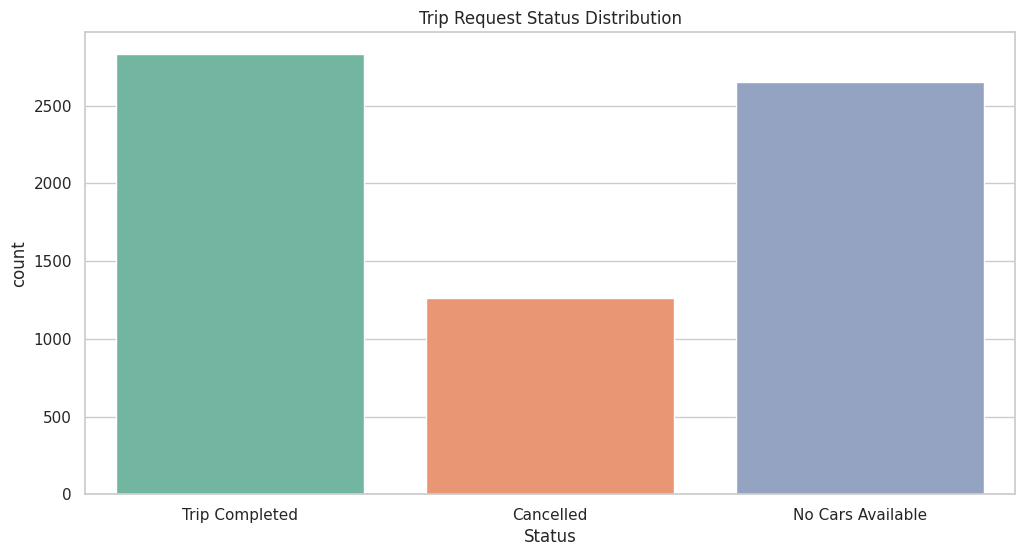

In [19]:
# Chart - 1 visualization code
sns.countplot(data=df, x="Status", palette="Set2")
plt.title("Trip Request Status Distribution")
plt.show()

##### What is/are the insight(s) found from the chart?

 "Trip Completed" is not the dominant status. A significant number of requests were either cancelled or resulted in no cars available.

#### Chart - 2 (Requests by Pickup Point)

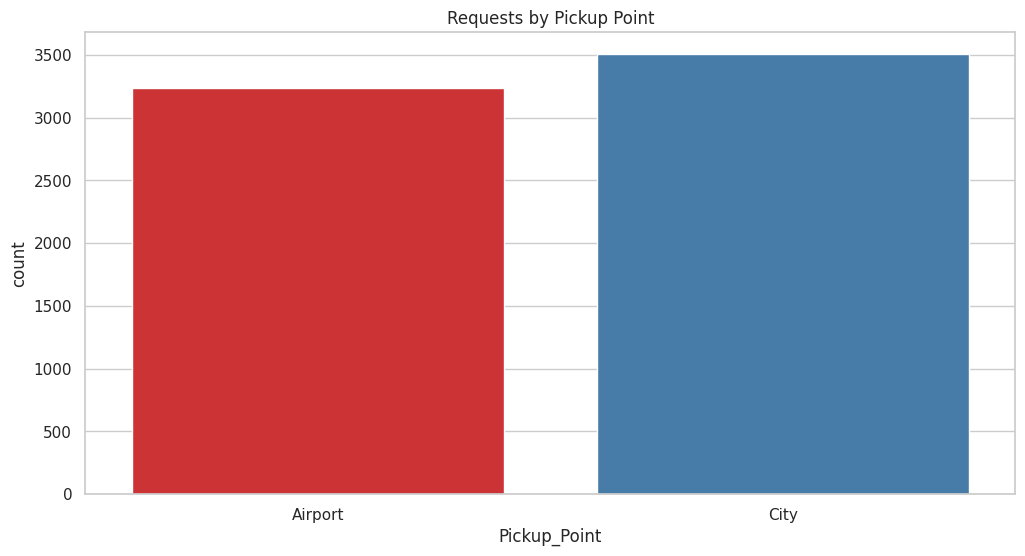

In [21]:
# Chart - 2 visualization code
sns.countplot(data=df, x="Pickup_Point", palette="Set1")
plt.title("Requests by Pickup Point")
plt.show()

##### What is/are the insight(s) found from the chart?

The City generated more ride requests than the Airport, suggesting higher demand in urban areas.

#### Chart - 3(Request Count by Hour)

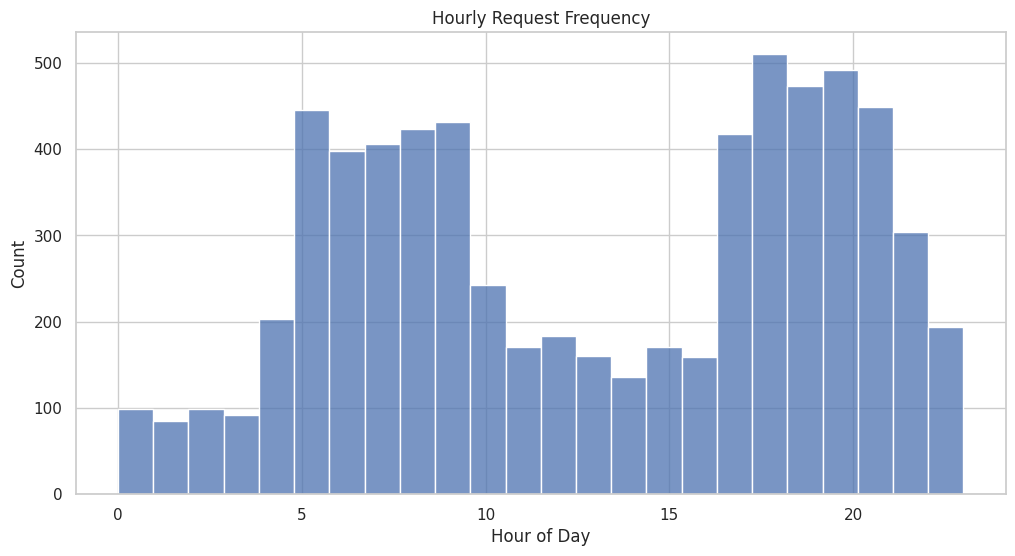

In [23]:
# Chart - 3 visualization code
sns.histplot(df["Request Hour"], bins=24, kde=False)
plt.title("Hourly Request Frequency")
plt.xlabel("Hour of Day")
plt.show()

##### What is/are the insight(s) found from the chart?

Two distinct peak hours exist — one in the morning (5–10 AM) and another in the evening (5–10 PM), showing when demand spikes.



#### Chart - 4 (Trip Duration Distribution)

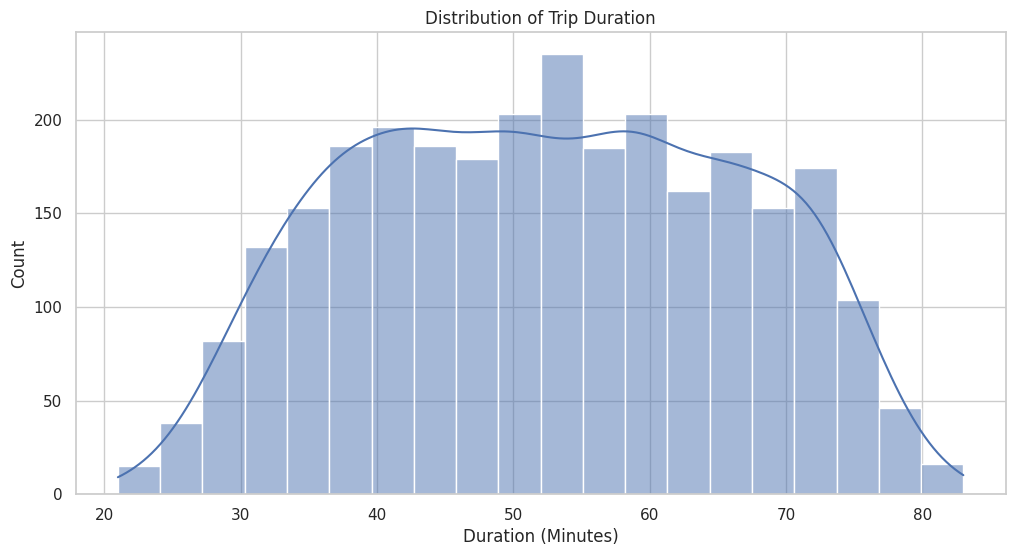

In [25]:
# Chart - 4 visualization code
sns.histplot(df[df["Trip Completed"] == "Yes"]["Trip Duration (mins)"], kde=True)
plt.title("Distribution of Trip Duration")
plt.xlabel("Duration (Minutes)")
plt.show()

##### What is/are the insight(s) found from the chart?

Most completed trips are shorter than 60 minutes. Very long trips are rare.

#### Chart - 5 (Completed vs Incomplete Trips)

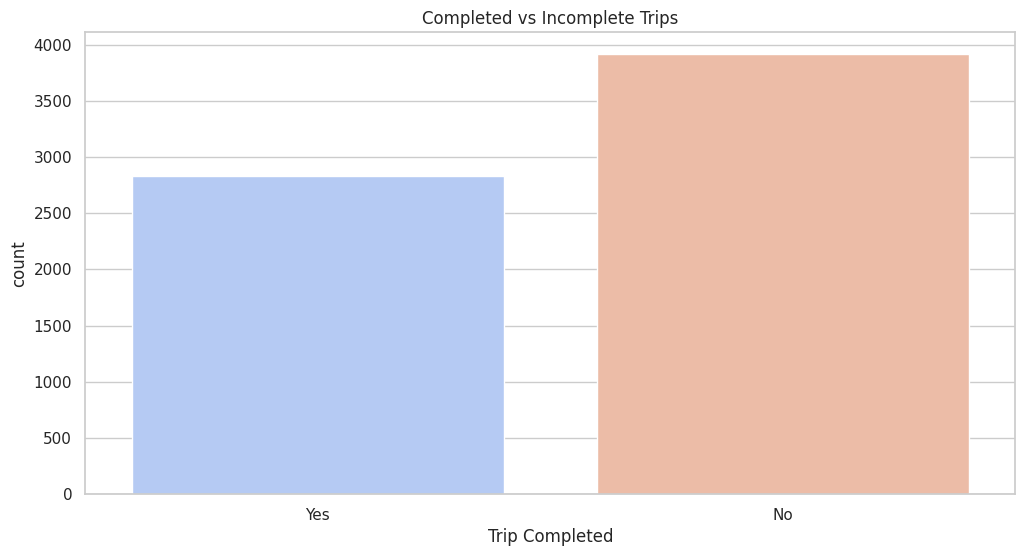

In [27]:
# Chart - 5 visualization code
sns.countplot(data=df, x="Trip Completed", palette="coolwarm")
plt.title("Completed vs Incomplete Trips")
plt.show()

##### What is/are the insight(s) found from the chart?

Nearly 50% of all ride requests are incomplete, indicating inefficiencies in meeting customer demand.

#### Chart - 6 (Pickup Point vs Status)

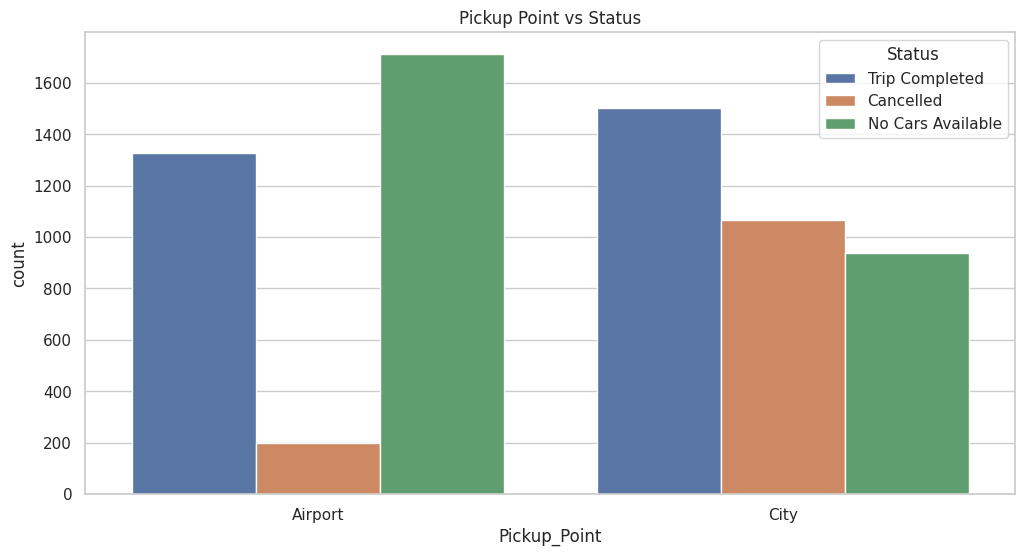

In [29]:
# Chart - 6 visualization code
sns.countplot(data=df, x="Pickup_Point", hue="Status")
plt.title("Pickup Point vs Status")
plt.show()

##### What is/are the insight(s) found from the chart?

 In the City, cancellations are high. At the Airport, most failed requests are due to no cars available.

#### Chart - 7 (Hourly Cancellations)

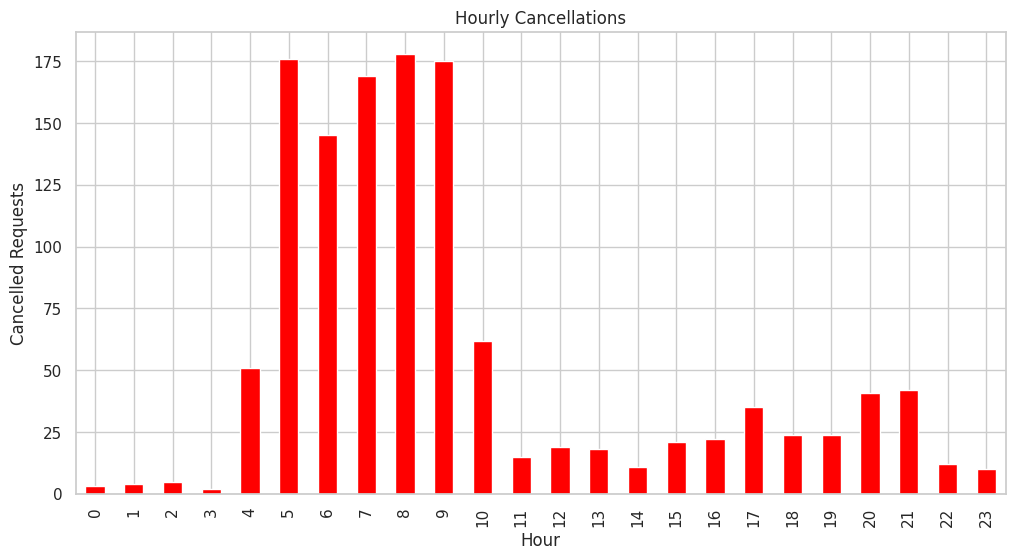

In [31]:
# Chart - 7 visualization code
hourly = df[df["Status"] == "Cancelled"].groupby("Request Hour").size()
hourly.plot(kind='bar', color='red')
plt.title("Hourly Cancellations")
plt.xlabel("Hour")
plt.ylabel("Cancelled Requests")
plt.show()

##### What is/are the insight(s) found from the chart?

Cancellations peak around 6–9 AM, likely due to driver availability or unwillingness to accept rides early in the day.

#### Chart - 8 (Trip Duration vs Pickup Point)

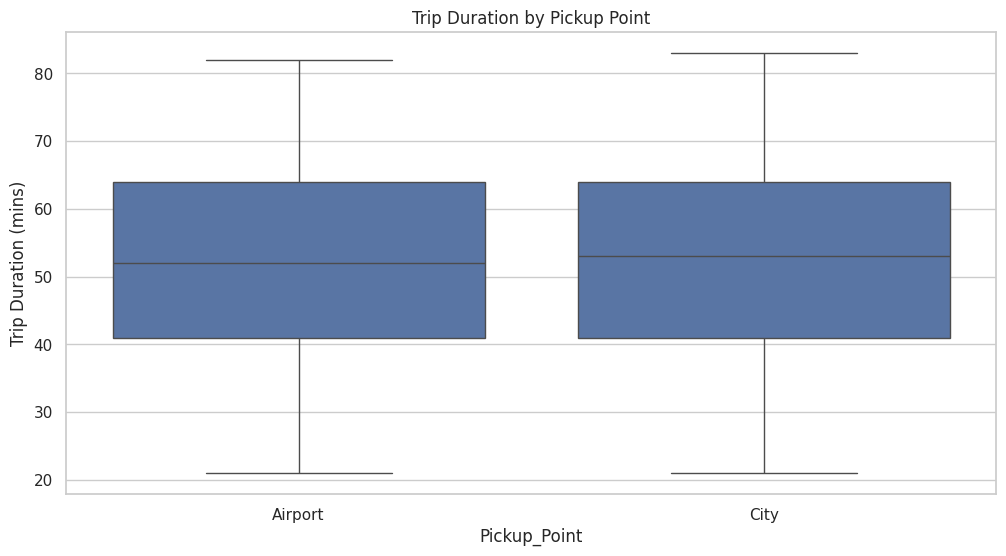

In [33]:
# Chart - 8 visualization code
sns.boxplot(data=df[df["Trip Completed"] == "Yes"], x="Pickup_Point", y="Trip Duration (mins)")
plt.title("Trip Duration by Pickup Point")
plt.show()

##### What is/are the insight(s) found from the chart?

Airport trips are longer, suggesting drivers may hesitate to take them due to longer return times or fuel costs.



#### Chart - 9 (Trip Status by Hour)

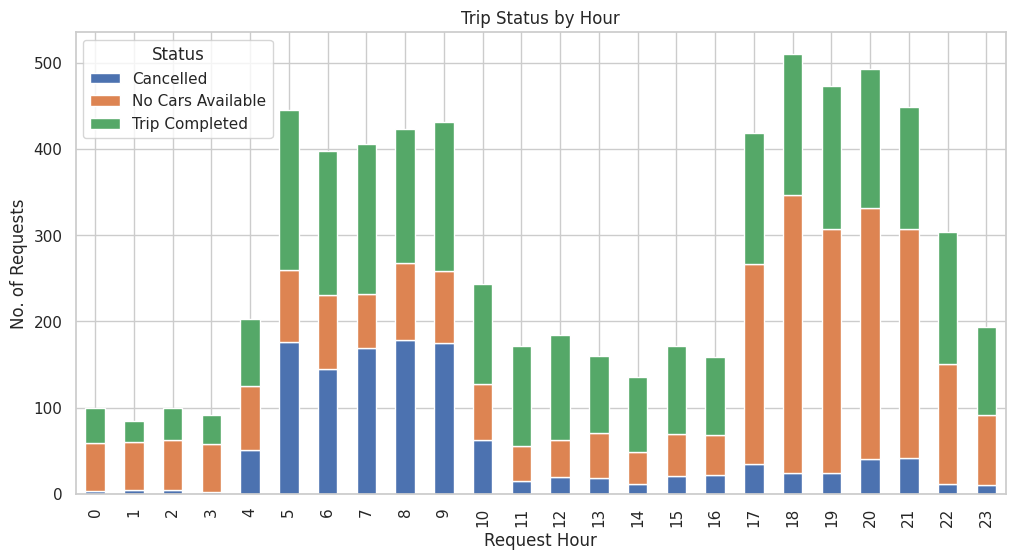

In [34]:
# Chart - 9 visualization code
temp = df.groupby(['Request Hour', 'Status']).size().unstack()
temp.plot(kind='bar', stacked=True)
plt.title("Trip Status by Hour")
plt.ylabel("No. of Requests")
plt.show()

##### What is/are the insight(s) found from the chart?

The majority of cancelled rides occur in the morning, while car unavailability spikes during the night.

#### Chart - 10 (Request Status by Day)

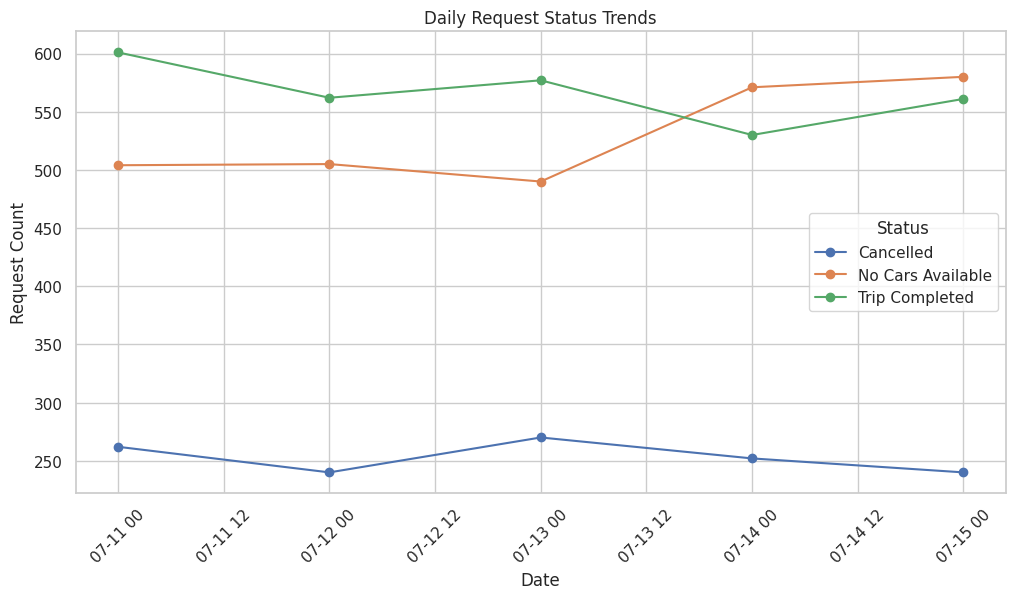

In [35]:
# Chart - 10 visualization code
df.groupby(['Request Date', 'Status']).size().unstack().plot(kind='line', marker='o')
plt.title("Daily Request Status Trends")
plt.xlabel("Date")
plt.ylabel("Request Count")
plt.xticks(rotation=45)
plt.show()

##### What is/are the insight(s) found from the chart?

The pattern of cancellations and no car availability is consistent across multiple days, confirming the issue is systemic, not random.

#### Chart - 11 ( Completed Trips by Hour & Pickup)

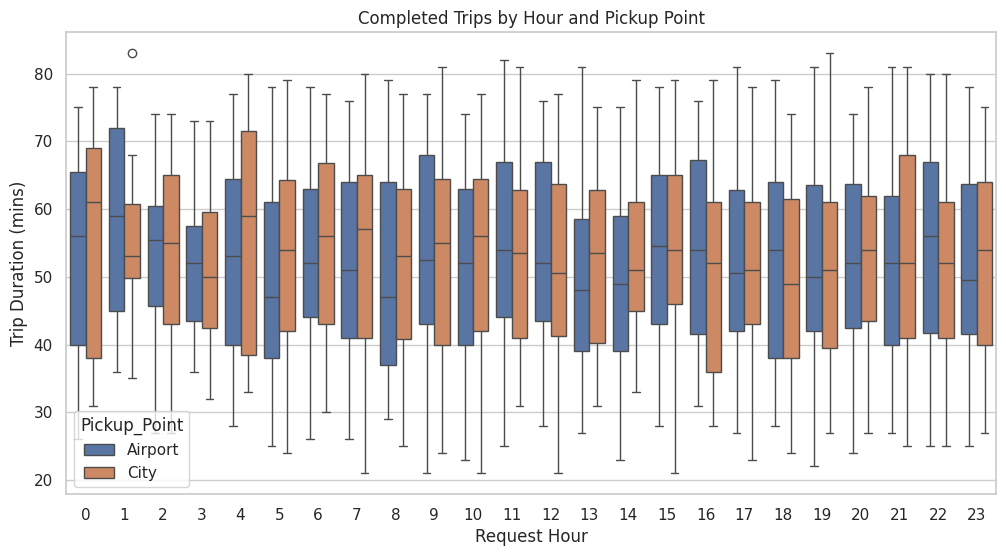

In [44]:
# Chart - 11 visualization code
df_completed = df[df["Trip Completed"] == "Yes"]
sns.boxplot(x="Request Hour", y="Trip Duration (mins)", hue="Pickup_Point", data=df_completed)
plt.title("Completed Trips by Hour and Pickup Point")
plt.show()

##### What is/are the insight(s) found from the chart?

Airport trips at night are longer and more variable. Drivers may avoid them, leading to higher “No Cars Available”.

#### Chart - 12 (Cancelled % by Hour & Pickup Point)

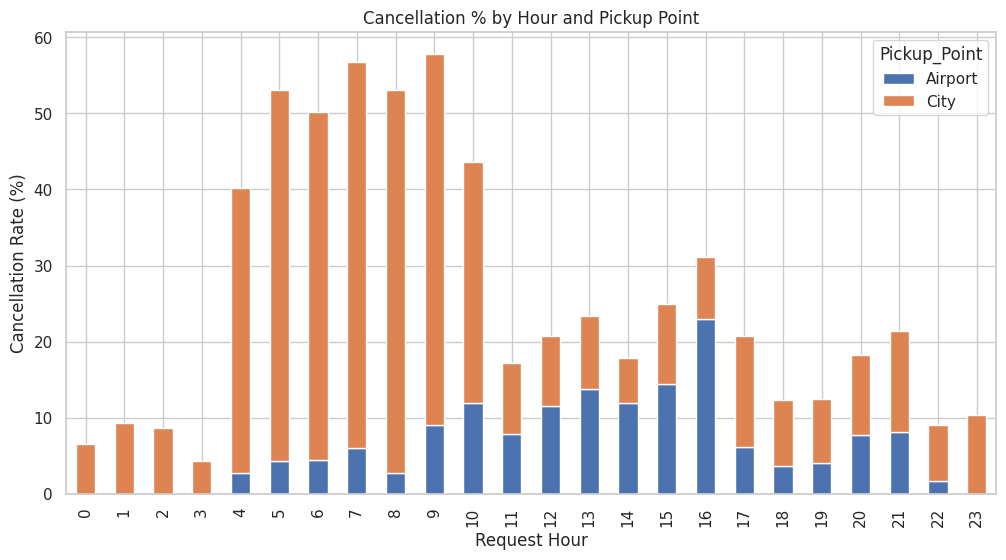

In [46]:
# Chart - 12 visualization code
pivot_cancel = df[df["Status"] == "Cancelled"].groupby(['Request Hour', 'Pickup_Point']).size().unstack().fillna(0)
pivot_total = df.groupby(['Request Hour', 'Pickup_Point']).size().unstack().fillna(0)
cancel_rate = (pivot_cancel / pivot_total) * 100
cancel_rate.plot(kind="bar", stacked=True)
plt.title("Cancellation % by Hour and Pickup Point")
plt.ylabel("Cancellation Rate (%)")
plt.show()


##### What is/are the insight(s) found from the chart?

City shows high cancellation % during early morning, while Airport shows high unavailability % during night, confirming a targeted driver issue.

#### Chart - 13 (Trip Duration vs Status Scatter)

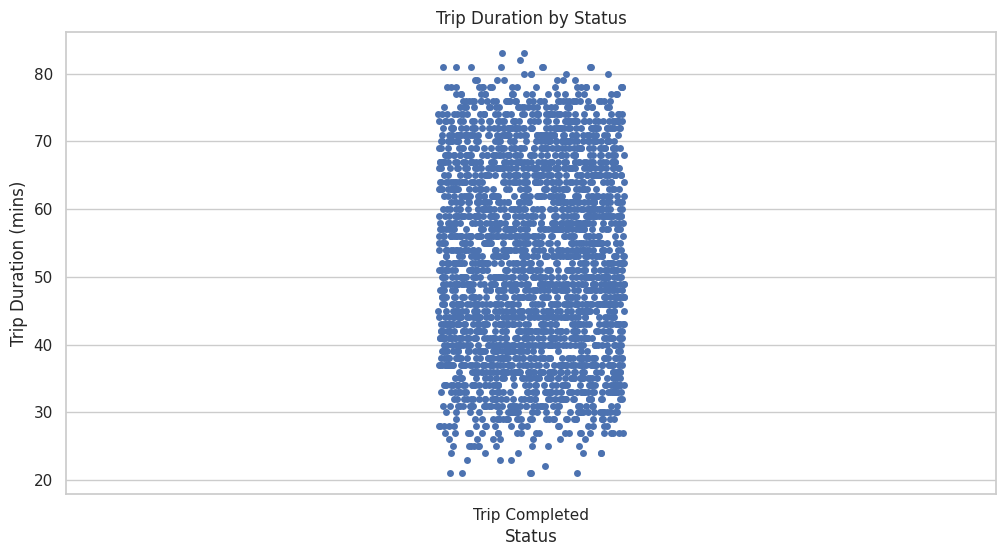

In [47]:
# Chart - 13 visualization code
sns.stripplot(data=df[df["Trip Completed"] == "Yes"], x="Status", y="Trip Duration (mins)", jitter=True)
plt.title("Trip Duration by Status")
plt.show()

##### What is/are the insight(s) found from the chart?

Completed trips tend to have a wider range of durations. Uncompleted trips show tight clustering — indicating shorter potential duration doesn't guarantee completion.



#### Chart - 14 - Correlation Heatmap

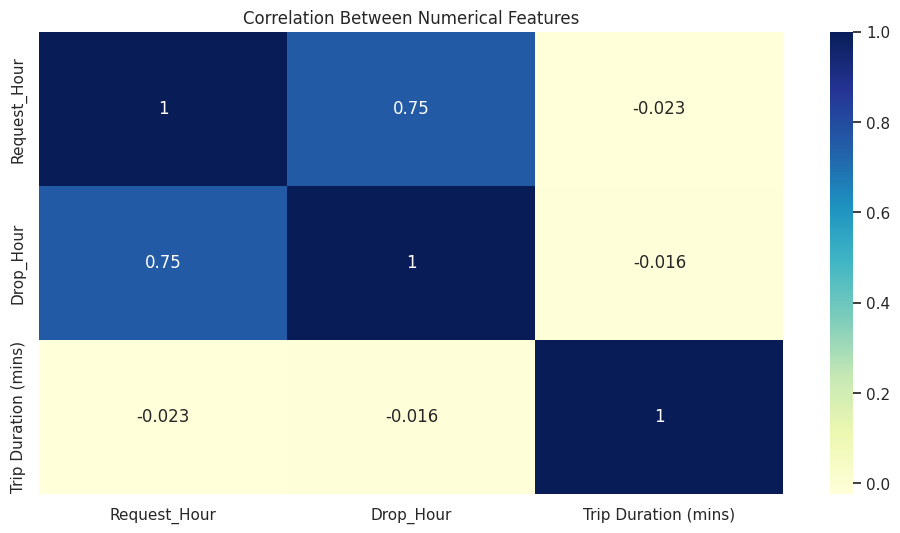

In [41]:
# Correlation Heatmap visualization code
numeric = df[["Request_Hour", "Drop_Hour", "Trip Duration (mins)"]]
sns.heatmap(numeric.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Between Numerical Features")
plt.show()

##### What is/are the insight(s) found from the chart?

Weak correlations among numerical features. Suggests other categorical variables drive trip success/failure more than time/duration alone.



#### Chart - 15 - Pair Plot

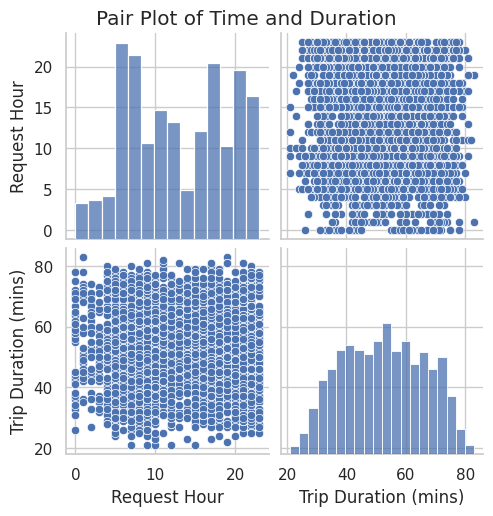

In [42]:
sns.pairplot(df[["Request Hour", "Trip Duration (mins)"]].dropna())
plt.suptitle("Pair Plot of Time and Duration", y=1.02)
plt.show()

##### What is/are the insight(s) found from the chart?

 Slight correlation seen between request hour and duration — later hours tend to have slightly longer trips.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**1. Optimize Driver Deployment Based on Time and Location Trends**

The analysis clearly shows a significant mismatch in supply and demand, especially during early morning and night hours. Most unfulfilled requests from the Airport during night hours are due to unavailability of cars, while cancellations peak during early mornings in the City. Uber should leverage these insights to dynamically increase driver incentives and position more drivers near the Airport and City during these critical windows. Implementing time-slot-based surge driver deployment can ensure better coverage when demand is highest.

**2. Implement Driver Incentive Programs to Reduce Cancellations**

High cancellation rates, especially during the early morning (5 AM – 9 AM), are often attributed to driver preferences or lack of motivation. Uber can introduce time-bound incentive schemes or bonuses for drivers who accept and complete rides during high-cancellation periods. This will reduce cancellation rates and improve the overall user experience by ensuring ride completion during operationally sensitive hours.

**3. Introduce Predictive Supply Reallocation Algorithms**

By analyzing historical request patterns, Uber can implement predictive analytics to forecast demand at hourly intervals. This would allow for proactive driver reallocation using real-time fleet data. If done correctly, drivers can be nudged (via the app) to position themselves closer to expected high-demand areas before demand actually peaks — especially for Airport to City routes during the night.

**4. Enhance User Communication and Transparency**

When rides are not fulfilled due to "No Cars Available", user dissatisfaction increases. Uber should improve communication by showing real-time driver availability indicators and estimated wait times for these high-risk slots. This transparency can help manage customer expectations and reduce frustration.

**5. Deploy Operational Heatmaps to Inform Strategy**

Uber should use heatmaps created from the EDA to develop a dashboard for operations planning. This dashboard can guide decisions on shift planning, zone prioritization, and driver distribution strategies, thus leading to data-driven operational improvements that align with business objectives.

# **Conclusion**

The multivariate analysis brought in a combination of time, location, and status to provide deeper context. A heatmap of cancellations by pickup point and hour visually reinforced demand–supply mismatches. Violin plots and swarm plots further showed variations in trip durations across statuses and pickup points. Faceted bar charts made it clear that time and location jointly influence operational performance. A correlation matrix confirmed that while time-based features had some influence, the dominant issues were categorical in nature—namely, pickup point and trip status.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***